In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
class Pandemic:
    def __init__(self, popSize, i0, avgExposure):
        self.popSize = popSize
        self.i0 = i0
        self.avgExposure = avgExposure
        self.reset()
    
    def reset(self):
        self.transition = self.getDeterministicTransition()
        self.state = self.genInitialState()
    
    def getDeterministicTransition(self):
        size = self.popSize
        avgExposure = self.avgExposure
        exposure = np.random.poisson(avgExposure, size)
        graph = np.zeros((size, size))
        for i, n in enumerate(exposure):
            for j in np.random.choice(size, n, False):
                graph[i, j] = 0.5
        graph = np.tril(graph, -1) + np.tril(graph, -1).T

        return graph
    
    def genInitialState(self):
        size = self.popSize
        i0 = self.i0
        state = {
            'S' : {i:1 for i in np.arange(size)},
            'I' : {},
            'R' : {}
        }
        
        infected = np.random.choice(size, i0, False)
        for i in infected:
            state['S'].pop(i, None)
            state['I'][i] = int(np.random.normal(14, 2))
            
        return state
    
    def step(self):
        for i in list(self.state['I']):
            for j, prob in enumerate(self.transition[i]):
                if j in self.state['S'] and np.random.random() < prob:
                    self.state['S'].pop(j, None)
                    self.state['I'][j] = int(np.random.normal(14, 2))
            
            if self.state['I'][i] > 0:
                self.state['I'][i] -= 1
            else:
                self.state['I'].pop(i, None)
                self.state['R'][i] = 1

In [37]:
foo = Pandemic(100, 2, 2)

In [38]:
foo.transition

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.5],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ]])

In [4]:
print(foo.state)

{'S': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1}, 'I': {7: 13, 42: 10}, 'R': {}}


In [5]:
print(foo.transition)

[[0.    0.02  0.001 ... 0.001 0.001 0.001]
 [0.02  0.    0.001 ... 0.001 0.001 0.02 ]
 [0.001 0.001 0.    ... 0.001 0.001 0.001]
 ...
 [0.001 0.001 0.001 ... 0.    0.001 0.02 ]
 [0.001 0.001 0.001 ... 0.001 0.    0.001]
 [0.001 0.02  0.001 ... 0.02  0.001 0.   ]]


In [6]:
for i in range(5):
    foo.step()
    print(foo.state)

{'S': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1}, 'I': {7: 12, 42: 9}, 'R': {}}
{'S': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 43: 1, 

In [59]:
foo = Pandemic(1000, 2, 3)
history = [[len(foo.state['S']), len(foo.state['I']), len(foo.state['R'])]]
for i in range(100):
    foo.step()
    history.append([len(foo.state['S']), len(foo.state['I']), len(foo.state['R'])])

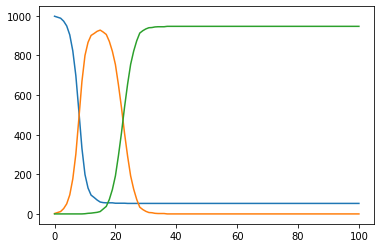

In [60]:
plt.plot(history)

### TODO

### Bibliografia

In [15]:
np.arange(5)

array([0, 1, 2, 3, 4])